In [28]:
import numpy as np    #importing packages
import pandas as pd  
import matplotlib.pyplot as plt  #importing matplotlib
import seaborn as sns  #importing seaborn
from sklearn.model_selection import train_test_split   #importing sklearn packages
from sklearn.preprocessing import StandardScaler  
from sklearn import datasets  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [29]:
boston = datasets.load_boston()    #loading dataset
features = pd.DataFrame(boston.data, columns=boston.feature_names)    #renaming columns with feature names
targets = boston.target     #getting the target column
bos = pd.DataFrame(boston.data)     #loading data into bos dataframe
bos.columns = boston.feature_names     #renaming the columns
bos['PRICE'] = boston.target      #adding price column
print(bos.head())    #displaying the top 5 records

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [30]:
X = bos.iloc[:, :-1].values     #differentiating independent features & storing them in X 
y = bos.iloc[:, -1].values      #differentiating dependent features from dataframe & storing them in Y
#Splitting dataset into Training set & Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
sc = StandardScaler()    #creating instance of StandardScaler
X_train = sc.fit_transform(X_train)      #normalizing train input dataset
X_test = sc.transform(X_test)      #normalizing test input dataset
regressor = RandomForestRegressor(n_estimators=100,random_state=0)    #creating instance of RandomForestRegressor model
regressor.fit(X_train,y_train)      #fitting training dataset into model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
y_pred = regressor.predict(X_test)    #predicting testset output from model & storing them in y_pred
score=r2_score(y_test,y_pred)     #calculating accuracy of model using r2_score 
print(score*100)   #printing accuracy score

90.81940932283322


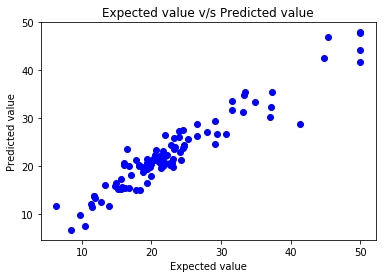

In [33]:
plt.scatter(y_test,y_pred,color='blue')     #plotting expected value v/s predicted value
plt.title('Expected value v/s Predicted value')     #setting title,labels to plot
plt.xlabel('Expected value')
plt.ylabel('Predicted value')
plt.show()     #displaying plot